# Chapter 10.
Project: Multiclass Classification of Flower Species

Using the Iris dataset with the following features:
    
    1. Sepal length in centimeters.
    2. Sepal width in centimeters.
    3. Petal length in centimeters.
    4. Petal width in centimeters.
    5. Class.

In [1]:
# Download the data from its repository
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

--2020-02-28 18:19:48--  http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: ‘iris.data’

iris.data           100%[===================>]   4.44K  --.-KB/s    in 0s      

2020-02-28 18:19:49 (186 MB/s) - ‘iris.data’ saved [4551/4551]



In [2]:
# Check working directory for data
!ls

 AMMI_Models.py
'Deep Learning using Keras with Tensorflow and Theano backend..ipynb'
'Deep Learning With Tensorflow, Keras, Theano, Python.ipynb'
 iris.data
'Linear Algebra and Basics Mathematics..ipynb'
 model_plot.png
 pima-indians-diabetes.data.csv
 __pycache__


In [3]:
# Import classes and functions
import numpy as np
import pandas as pd
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [4]:
# Set random seed for reproducibility
seed = 7
np.random.seed(seed)

In [5]:
# Read iris dataset
dataframe = pd.read_csv('iris.data', header = None)
dataset = dataframe.values
dataset.shape

(150, 5)

In [6]:
# Split into Features and Labels
X = dataset[:, :4].astype(float)
Y = dataset[:, 4]
X.shape, Y.shape

((150, 4), (150,))

In [ ]:
pd.get_dummies

In [7]:
# Encode the output variable Y
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (one-hot-encode)
dummy_y = np_utils.to_categorical(encoded_Y)
dummy_y.shape

(150, 3)

In [8]:
# Define our baseline neural network
def baseline_model():
    # Create model
    model = Sequential()
    model.add(Dense(4, input_dim = 4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(3, kernel_initializer='normal', activation = 'sigmoid'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

In [9]:
# Call the model and check the summary.
model = baseline_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 15        
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Import and time fitting operation
import time

In [11]:
# Wrap our neural network model using the Keras Wrapper
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose = 0)
# Setup our KFold cross validation
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
# Evaluate model (estimator) on dataset (X and dummy_y)
start = time.time()
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
end = time.time()
print("Operation took %.2f%% minutes"%((end-start)/60))
print("Accuracy: %.2f%% (%.2f%%)" %(results.mean()*100, results.std()*100))

Operation took 0.51% minutes
Accuracy: 88.67% (21.09%)


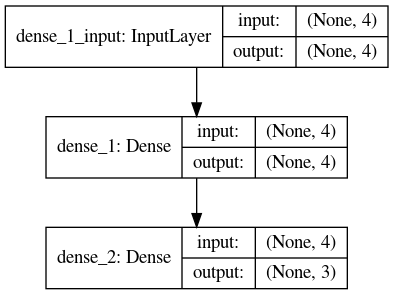

In [12]:
plot_model(model, to_file='baseline_model_plot.png', show_shapes=True, show_layer_names=True)

# Chapter 11.
Project: Binary Classification of Sonar Returns using the Sonar dataset

In [13]:
# Fetch data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data

--2020-02-28 18:59:41--  https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87776 (86K) [application/x-httpd-php]
Saving to: ‘sonar.all-data’

sonar.all-data      100%[===================>]  85.72K  93.0KB/s    in 0.9s    

2020-02-28 18:59:44 (93.0 KB/s) - ‘sonar.all-data’ saved [87776/87776]



In [15]:
!ls

 AMMI_Models.py
 baseline_model_plot.png
'Deep Learning using Keras with Tensorflow and Theano backend..ipynb'
'Deep Learning With Tensorflow, Keras, Theano, Python.ipynb'
 iris.data
'Linear Algebra and Basics Mathematics..ipynb'
 model_plot.png
 pima-indians-diabetes.data.csv
 __pycache__
 sonar.all-data


In [16]:
# Read data to a csv
dataframe = pd.read_csv("sonar.all-data", header=None)
dataset = dataframe.values
dataset.shape

(208, 61)

In [17]:
# Split data into X and Y variables
X = dataset[:,:60].astype(float)
Y = dataset[:, 60]

In [18]:
# Encode the class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [19]:
# Create baseline model
def create_baseline():
    # Create model
    model = Sequential()
    model.add(Dense(60, input_dim=60, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [20]:
model = create_baseline()
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 60)                3660      
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 61        
Total params: 3,721
Trainable params: 3,721
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Import stratified kfold for binary classification.
from sklearn.model_selection import StratifiedKFold
# Build keras wrapper
estimator = KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose = 0)
kfold = StratifiedKFold(n_splits=10, shuffle = True, random_state = seed)
start = time.time()
results = cross_val_score(estimator, X, encoded_Y, cv=kfold)
end = time.time()
print("Operation completed in %.2f%% minutes" %((end-start)/60))
print("Baseline: %.2f%% (%.2f%%)" %(results.mean()*100, results.std()*100))

Operation completed in 0.55% minutes
Baseline: 80.80% (6.37%)


We see the accuracy a simple baseline model gives us. We can attempt to improve this performance by doing data preparation.

#### Improve network by scaling data

In [23]:
# Let's standard scale our data and pass this in a pipeline class to avoid data leakage.
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [24]:
# Evaluate baseline model with standardized dataset.
estimators = [] # Create empty list.
estimators.append(('standardize', StandardScaler())) # Call the standard scaler class and append to list.
# Wrap the model using the keras wrapper and append to the list.
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=100, batch_size= 5, verbose=0)))
# Set the pipeline to the created list with the operations in order.
pipeline = Pipeline(estimators)
# Create a stratified kfold split.
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
# run the model
start = time.time()
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
end = time.time()
print('Operation completed in %.2f%% seconds'%(end-start))
print('Standardized: %.2f%% (%.2f%%)' % (results.mean()*100, results.std()*100))

Operation completed in 24.63% seconds
Standardized: 84.59% (7.44%)


#### Improve network by tuning layers and neurons in the model

There are many things to tune on a neural network, such as the weight initialization, activation
functions, optimization procedure and so on. 

One aspect that may have an outsized effect is the structure of the network itself called the network topology. 

In this section we take a look at two experiments on the structure of the network: 
    making it smaller and making it larger. 
    
These are good experiments to perform when tuning a neural network on your problem.

##### Smaller Network

In [25]:
def smaller_baseline():
    model = Sequential()
    model.add(Dense(30, input_dim = 60, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation= 'sigmoid'))
    #compile model
    model.compile(loss ='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
    return model

In [27]:
# Using the smaller model and standardizing the dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=smaller_baseline, epochs = 100, 
                                          batch_size = 5, verbose = 0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state = seed)
start = time.time()
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
end = time.time()
print('Time taken: %.2f seconds'%(end-start))
print("Smaller network: %.2f%% (%.2f%%)" %(results.mean()*100, results.std()*100))

Time taken: 30.33% seconds
Smaller network: 84.11% (7.51%)


##### Larger Network

In [28]:
def larger_baseline():
    model = Sequential()
    model.add(Dense(60, input_dim = 60, kernel_initializer='normal', activation = 'relu'))
    model.add(Dense(30, kernel_initializer='normal', activation = 'relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # compile model
    model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
    return model

In [29]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=larger_baseline, epochs = 100, 
                                          batch_size = 5, verbose =0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
start = time.time()
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
end = time.time()
print('Time taken: %.2f%% seconds'%(end-start))
print('Larger network: %.2f%% (%.2f%%)' %(results.mean()*100, results.std()*100))

Time taken: 30.54% seconds
Larger network: 82.64% (7.88%)


Turns out it became worse, however these are techniques one can use in lifting the performance of a model.

We can attempt changing the choice of optimization algorithm and the number of training epochs and verify what these tunes will give us.

Summary:
We have seen how to:
    1. How to create a baseline neural network model.
    2. How to evaluate a Keras model using scikit-learn and stratified k-fold cross validation.
    3. How data preparation schemes can lift the performance of your models.
    4. How experiments adjusting the network topology can lift model performance.

# Chapter 12:
    Project: Regression of Boston House Prices.

We will skip this (probably come back later), you can go ahead and build the code for this project. It basically is a regression task.

We will take the chapter on saving your models for later with Serialization

# Chapter 13:
    Saving models for later with Serialization

Objectives:
    1. How to save and load Keras model weights to HDF5 formatted files.
    2. How to save and load Keras model structure to JSON files.
    3. How to save and load Keras model structure to YAML files.

HDF5 Format:

    Model weights are saved to HDF5 format. This is a grid format that is ideal for storing multi-dimensional arrays of numbers.
    
    HDF5 = Heirarchical Data Format.
    
    A flexible data storage format and is convenient for storing large arrays of real values, as we have in the weights of neural networks.
    
    Model structure is converted to a JSON format and written to model.json.
    Network weights are written to model.h5 in the local directory.

In [30]:
!pip3 install h5py

Defaulting to user installation because normal site-packages is not writeable


In [32]:
#Build a simple model to save.

# Split data into X and Y variables
# Encode Y variable.

# Create model
model = Sequential()
model.add(Dense(60, input_dim = 60, kernel_initializer='normal', activation = 'relu'))
model.add(Dense(30, kernel_initializer='normal', activation = 'relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
# compile model
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
# fit the model
model.fit(X, encoded_Y, epochs = 150, batch_size=5, verbose=0)
# Evaluate the model
scores = model.evaluate(X, encoded_Y, verbose = 0)
print('%s: %.2f%%' % (model.metrics_names[1], scores[1]*100))

accuracy: 100.00%


In [33]:
# Saving a neural network model to json (Using the last model for the Sonar dataset)
# Import libraries for saving models
from keras.models import model_from_json # to load models
import os # to make changes to local directory
# Serialize model to json
model_json = model.to_json()
with open('Models/model_sonar.json', 'w') as json_file:
    json_file.write(model_json)

In [34]:
# Serialize weights to HDF5
model.save_weights('Weights/model_sonar.h5')
print('Saved model to disk...')

Saved model to disk...


###### Reuse your saved model

In [35]:
# Load json and create model
json_file = open('Models/model_sonar.json', 'r')
# Read the json file
loaded_model_json = json_file.read()
# Close the read operation
json_file.close()
# Load the model from json
loaded_model = model_from_json(loaded_model_json)

In [36]:
# Load weights into new model
loaded_model.load_weights('Weights/model_sonar.h5')
print('Loaded model from disk...')

Loaded model from disk...


In [38]:
# Compile loaded model
loaded_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# Evaluate loaded model on test data
score = loaded_model.evaluate(X, encoded_Y, verbose= 0)
print('%s: %.2f%%' % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 100.00%


YAML Format:
    
    Same as to json just with a different format YAML.
    
    The model specification is saved to a .YAML file and we can load this back later.

In [39]:
# Import modules for saving to yaml
from keras.models import model_from_yaml

# With same data and model as before

# Serialize model to YAML
model_yaml = model.to_yaml()
with open('Models/model_sonar.yaml', 'w') as yaml_file:
    yaml_file.write(model_yaml)
    
# Serialize weights to HDF5
model.save_weights('Weights/model_sonar2.h5')
print('Saved model and weights to disk ...')

Saved model and weights to disk ...


##### Reuse saved YAML model

In [40]:
# Load YAML and create model
yaml_file = open('Models/model_sonar.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_yaml(loaded_model_yaml)
# Load weights into model
loaded_model.load_weights('Weights/model_sonar2.h5')
print('Loaded model from disk...')

Loaded model from disk...


In [41]:
# Evaluate loaded model on teest data
loaded_model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X, encoded_Y, verbose=0)
print('%s: %.2f%%' % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 100.00%


In [43]:
import keras
keras.backend.clear_session()

# Chapter 14:
    Keeping the best Models during Training with Checkpointing.